# DADA2 pipeline for Hyphosphere Exp 11

* Need to define for each dataset
** Number of cores
** OutFolder
** Path to sequence directory

In [1]:
ncores = 20

In [2]:
library(dada2)
library(tidyr)
library(dplyr)

Loading required package: Rcpp

Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



In [3]:
seqDIR = '~/Hyphosphere/data/MiSeq/20190603/demultiplexed'
path = seqDIR

#location of taxonomy database
TrainingSet = '~/databases/silva_nr_v132_train_set.fa.gz'
SpeciesTraining = '~/databases/silva_species_assignment_v132.fa.gz'

# Sample data table
SamTab = '~/Hyphosphere/Exp11/Exp11_MappingFile.txt'

# output folder
OutFolder = '~/Hyphosphere/data/Exp11/DADA2Files'


# Filter and trim


In [4]:
#Collect forward and reverse names in order
fastqFs <- sort(list.files(path, pattern=".R1.fq.gz"))
fastqRs <- sort(list.files(path, pattern=".R2.fq.gz"))
if(length(fastqFs) != length(fastqRs)) stop("Forward and reverse files do not match.")

In [5]:
#sample.names

## Plot quality profiles of forward and reverse reads

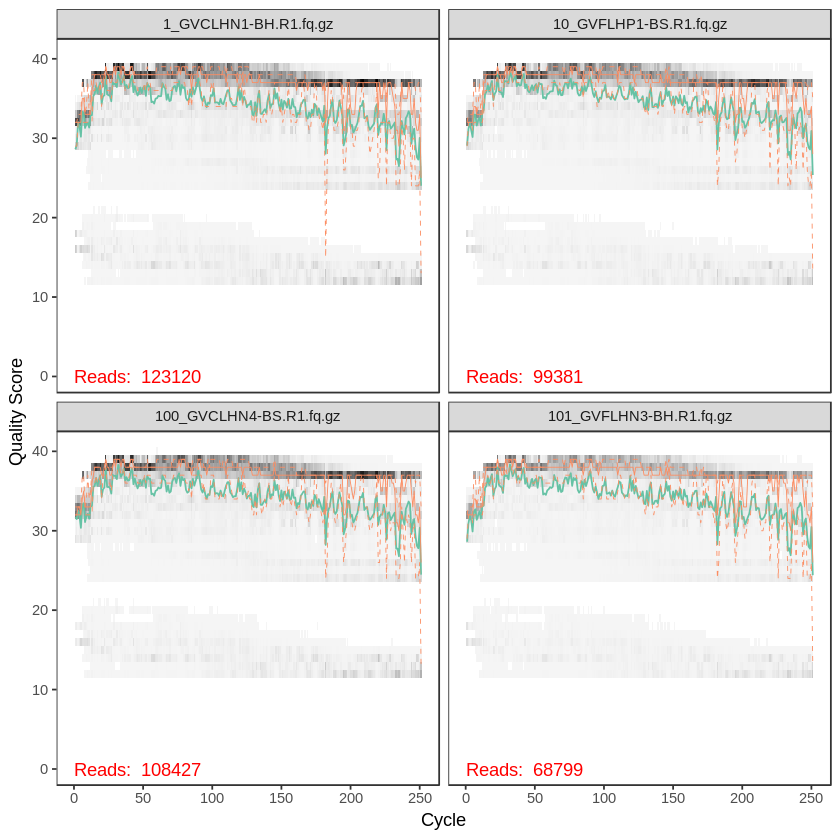

In [6]:
plotQualityProfile(file.path(path,fastqFs[1:4]))


* Foward reads look good.  Truncate to 175

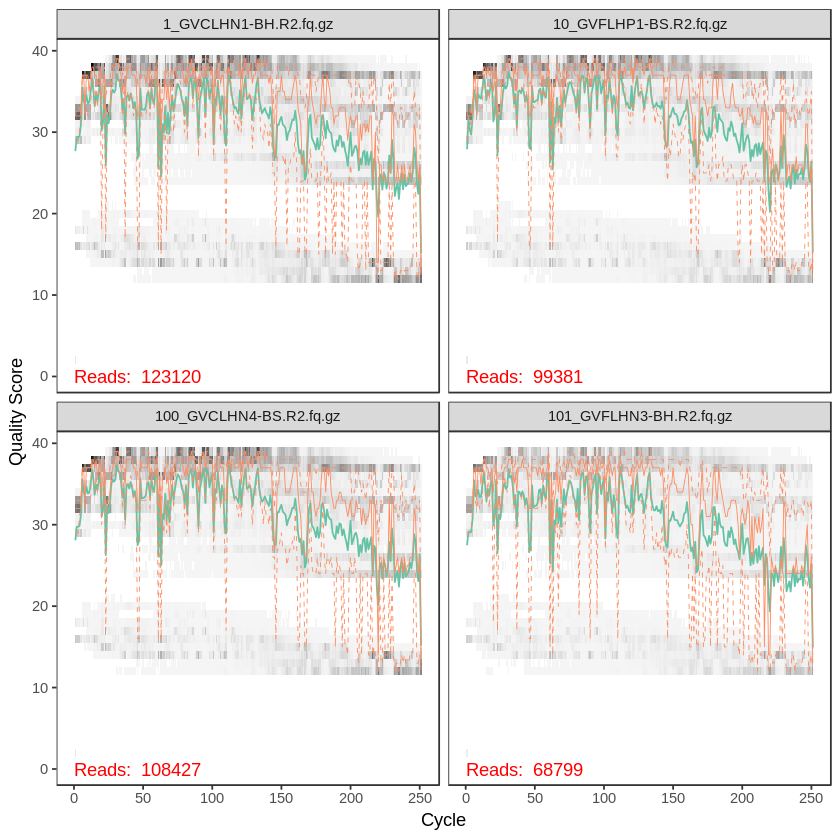

In [46]:
plotQualityProfile(file.path(path,fastqRs[1:4]))

* Reverse reads are very poor, trim to 130 and expect to loose many sequences

# Perform filtering and trimming


In [8]:
filtpathF <- file.path(path, "filtered_F") # Filtered forward files go into the pathF/filtered/ subdirectory
filtpathR <- file.path(path, "filtered_R") # ...

* Sequencing primers contain amplicon primer so no trimLeft is necessary

In [9]:
# Filtering: THESE PARAMETERS ARENT OPTIMAL FOR ALL DATASETS
out = filterAndTrim(fwd=file.path(path, fastqFs), filt=file.path(filtpathF, fastqFs),
              rev=file.path(path, fastqRs), filt.rev=file.path(filtpathR, fastqRs),
              truncLen=c(175,130), maxEE=2, truncQ=2, maxN=0, rm.phix=TRUE,
              compress=TRUE, verbose=TRUE, multithread=ncores)

Creating output directory: /home/be68/Hyphosphere/data/MiSeq/20190603/demultiplexed/filtered_F
Creating output directory:/home/be68/Hyphosphere/data/MiSeq/20190603/demultiplexed/filtered_R


In [10]:
head(out)

,reads.in,reads.out
1_GVCLHN1-BH.R1.fq.gz,123120,109349
10_GVFLHP1-BS.R1.fq.gz,99381,90430
100_GVCLHN4-BS.R1.fq.gz,108427,96811
101_GVFLHN3-BH.R1.fq.gz,68799,61320
102_GVFLHN3-BS.R1.fq.gz,88288,79397
103_GVFLHN4-BH.R1.fq.gz,95202,85979


In [ ]:
# Continue here

In [15]:
filtFs <- list.files(filtpathF, pattern=".fq.gz", full.names = TRUE)
filtRs <- list.files(filtpathR, pattern=".fq.gz", full.names = TRUE)
sample.names <- sapply(strsplit(basename(filtFs), ".R1.fq.gz"), `[`, 1) # Assumes filename = samplename_XXX.fastq.gz
sample.namesR <- sapply(strsplit(basename(filtRs), ".R2.fq.gz"), `[`, 1) # Assumes filename = samplename_XXX.fastq.gz
if(!identical(sample.names, sample.namesR)) stop("Forward and reverse files do not match.")
names(filtFs) <- sample.names
names(filtRs) <- sample.names
sample.names

[1] "1_GVCLHN1-BH"   "10_GVFLHP1-BS"  "100_GVCLHN4-BS" "101_GVFLHN3-BH"
  [5] "102_GVFLHN3-BS" "103_GVFLHN4-BH" "104_GVFLHN4-BS" "105_GVFLHP3-BH"
  [9] "106_GVFLHP3-BS" "107_GVFLHP4-BH" "108_GVFLHP4-BS" "109_GVN7HN3-BH"
 [13] "11_GVFLHP2-BH"  "110_GVN7HN3-BS" "111_GVN7HN4-BH" "112_GVN7HN4-BS"
 [17] "113_GVN7HP3-BH" "114_GVN7HP3-BS" "115_GVN7HP4-BH" "116_GVN7HP4-BS"
 [21] "117_RIFLHN3-BH" "118_RIFLHN3-BS" "119_RIFLHN4-BH" "12_GVFLHP2-BS" 
 [25] "120_RIFLHN4-BS" "121_RIFLHP3-BH" "122_RIFLHP3-BS" "123_RIFLHP4-BH"
 [29] "124_RIFLHP4-BS" "125_RIN7HN3-BH" "126_RIN7HN3-BS" "127_RIN7HN4-BH"
 [33] "128_RIN7HN4-BS" "129_RIN7HP3-BH" "13_GVN7HN1-BH"  "130_RIN7HP3-BS"
 [37] "131_RIN7HP4-BH" "132_RIN7HP4-BS" "133_GVCLHN3-BP" "134_GVCLHN3-CS"
 [41] "135_GVCLHN4-BP" "136_GVCLHN4-CS" "137_GVFLHN3-BP" "138_GVFLHN3-CS"
 [45] "139_GVFLHN4-BP" "14_GVN7HN1-BS"  "140_GVFLHN4-CS" "141_GVFLHP3-BP"
 [49] "142_GVFLHP3-CS" "143_GVFLHP4-BP" "144_GVFLHP4-CS" "145_GVN7HN3-BP"
 [53] "146_GVN7HN3-CS" "147_GVN7HN4-BP" "148_GVN7HN4-CS" "149_GVN7HP3BP" 
 [57] "15_GVN7HN2-BH"  "150_GVN7HP3-CS" "151_GVN7HP4-BP" "152_GVN7HP4-CS"
 [61] "153_RIN7HN3-CS" "154_RIN7HN4-CS" "155_RIN7HP3-CS" "156_RIN7HP4-CS"
 [65] "157_GVCLHN3-CH" "158_GVCLHN3-RH" "159_GVCLHN3-RS" "16_GVN7HN2-BS" 
 [69] "160_GVCLHN4-CH" "161_GVCLHN4-RH" "162_GVCLHN4-RS" "163_GVFLHN3-CH"
 [73] "164_GVFLHN3-RH" "165_GVFLHN3-RS" "166_GVFLHN4-CH" "167_GVFLHN4-RH"
 [77] "168_GVFLHN4-RS" "169_GVFLHP3-CH" "17_GVN7HP1-BH"  "170_GVFLHP4-CH"
 [81] "171_GVN7HN3-CH" "172_GVN7HN3-RH" "173_GVN7HN4-CH" "174_GVN7HN4-RH"
 [85] "175_GVN7HN4-RS" "176_GVN7HP3-CH" "177_GVN7HP4-CH" "178_RIN7HN3-CH"
 [89] "179_RIN7HN3-RH" "18_GVN7HP1-BS"  "180_RIN7HN3-RS" "181_RIN7HN4-CH"
 [93] "182_RIN7HN4-RH" "183_RIN7HN4-RS" "184_RIN7HP3-CH" "185_RIN7HP4-CH"
 [97] "186_Unknown-RS" "187_139-BK"     "188_155-BK"     "189_187-BK"    
[101] "19_GVN7HP2-BH"  "190_GVN7HP2-BH" "191_GVCLHN2-BS" "192_MockComm"  
[105] "2_GVCLHN1-BS"   "20_GVN7HP2-BS"  "21_RIFLHN1-BH"  "22_RIFLHN1-BS" 
[109] "23_RIFLHN2-BH"  "24_RIFLHN2-BS"  "25_RIFLHP1-BH"  "26_RIFLHP1-BS" 
[113] "27_RIFLHP2-BH"  "28_RIFLHP2-BS"  "29_RIN7HN1-BH"  "3_GVCLHN2-BH"  
[117] "30_RIN7HN1-BS"  "31_RIN7HN2-BH"  "32_RIN7HN2-BS"  "33_RIN7HP1-BH" 
[121] "34_RIN7HP1-BS"  "35_RIN7HP2-BH"  "36_RIN7HP2-BS"  "37_GVCLHN1-BP" 
[125] "38_GVCLHN1-CS"  "39_GVCLHN2-BP"  "4_GVCLHN2-BS"   "40_GVCLHN2-CS" 
[129] "41_GVFLHN1-BP"  "42_GVFLHN1-CS"  "43_GVFLHN2-BP"  "44_GVFLHN2-CS" 
[133] "45_GVFLHP1-BP"  "46_GVFLHP1-CS"  "47_GVFLHP2-BP"  "48_GVFLHP2-CS" 
[137] "49_GVN7HN1-BP"  "5_GVFLHN1-BH"   "50_GVN7HN1-CS"  "51_GVN7HN2-BP" 
[141] "52_GVN7HN2-CS"  "53_GVN7HP1-BP"  "54_GVN7HP1-CS"  "55_GVN7HP2-BP" 
[145] "56_GVN7HP2-CS"  "57_RIN7HN1-CS"  "58_RIN7HN2-CS"  "59_RIN7HP1-CS" 
[149] "6_GVFLHN1-BS"   "60_RIN7HP2-CS"  "61_GVCLHN1-CH"  "62_GVCLHN1-RH" 
[153] "63_GVCLHN1-RS"  "64_GVCLHN2-CH"  "65_GVCLHN2-RH"  "66_GVCLHN2-RS" 
[157] "67_GVFLHN1-CH"  "68_GVFLHN1-RH"  "69_GVFLHN1-RS"  "7_GVFLHN2-BH"  
[161] "70_GVFLHN2-CH"  "71_GVFLHN2-RH"  "72_GVFLHN2-RS"  "73_GVFLHP1-CH" 
[165] "74_GVFLHP2-CH"  "75_GVN7HN1-CH"  "76_GVN7HN1-RS"  "77_GVN7HN1-RH" 
[169] "78_GVN7HN2-CH"  "79_GVN7HN2-RH"  "8_GVFLHN2-BS"   "80_GVN7HN2-RS" 
[173] "81_GVN7HP1-CH"  "82_GVN7HP2-CH"  "83_RIN7HN1-CH"  "84_RIN7HN1-RH" 
[177] "85_RIN7HN2-CH"  "86_RIN7HN2-RH"  "87_RIN7HP1-CH"  "88_RIN7HP2-CH" 
[181] "89_125-BK"      "9_GVFLHP1-BH"   "90_29-BK"       "91_77-BK"      
[185] "92_PCRblank"    "93_PCRblank"    "94_GVN7HP2-BS"  "95_GVCLHN2-CH" 
[189] "96_GVFLHN2-RS"  "97_GVCLHN3-BH"  "98_GVCLHN3-BS"  "99_GVCLHN4-BH"

## Learn errors

In [16]:
set.seed(100)
# Learn forward error rates
errF <- learnErrors(filtFs, multithread=ncores)
# Learn reverse error rates
errR <- learnErrors(filtRs, multithread=ncores)

106537200 total bases in 608784 reads from 7 samples will be used for learning the error rates.
103297610 total bases in 794597 reads from 10 samples will be used for learning the error rates.


Warning message:
“Transformation introduced infinite values in continuous y-axis”

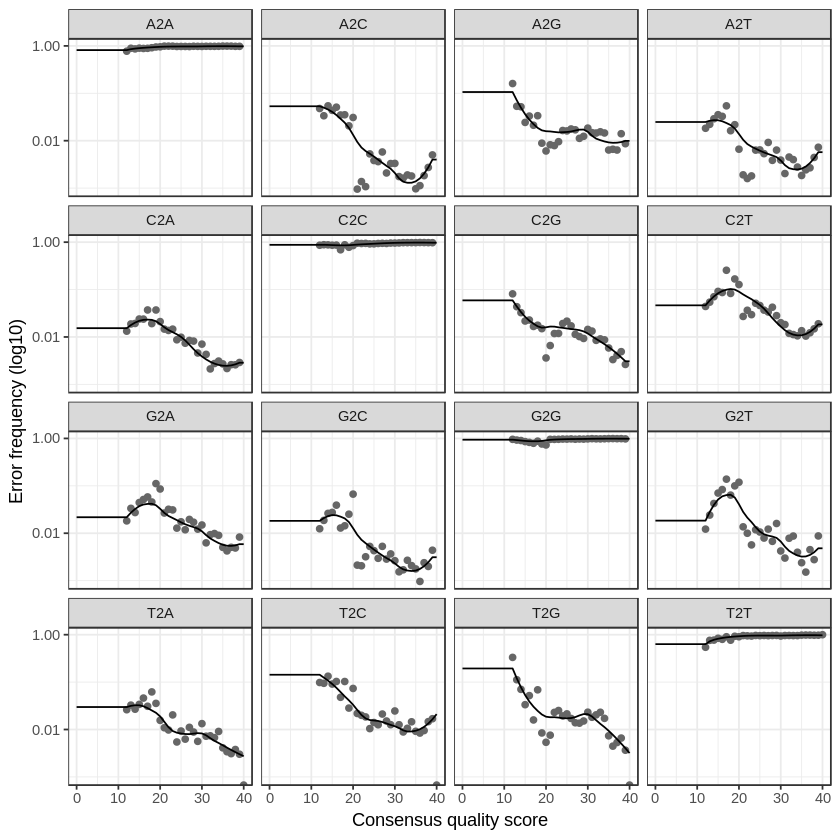

In [17]:
plotErrors(errF)

## Sequence inference

In [ ]:
# Sample inference and merger of paired-end reads
mergers <- vector("list", length(sample.names))
names(mergers) <- sample.names
for(sam in sample.names) {
  cat("Processing:", sam, "\n")
    derepF <- derepFastq(filtFs[[sam]])
    ddF <- dada(derepF, err=errF, multithread=ncores)
    derepR <- derepFastq(filtRs[[sam]])
    ddR <- dada(derepR, err=errR, multithread=ncores)
    merger <- mergePairs(ddF, derepF, ddR, derepR)
    mergers[[sam]] <- merger
}
rm(derepF); rm(derepR)

# Construct sequence table and remove chimeras

In [21]:

seqtab <- makeSequenceTable(mergers)

In [23]:
outFile = file.path(OutFolder,"seqtab.rds")
saveRDS(seqtab, outFile) 

In [24]:
dim(seqtab)
# Inspect distribution of sequence lengths
table(nchar(getSequences(seqtab)))

[1]   192 48898


  175   189   190   191   194   195   198   199   201   202   203   204   205 
   14     1     6     6     1     1     2     2     6     4     5     4     2 
  206   207   209   218   220   221   222   223   224   225   226   227   228 
    3     1    16     7     6    23     5    14    11     1     2    10     4 
  229   230   232   233   234   236   237   238   240   242   243   244   246 
    1     2     2     6     1     2     1     4     1     5     4     3     2 
  247   248   249   250   251   252   253   254   255   256   257   258   259 
   11    30    14    22    45   483 41303  3786   240   250   171    28    10 
  260   261   262   263   264   265   266   267   268   269   270   271   272 
   20    15     6     1     3     4     6     4     2   123   175   827   411 
  273   274   275   276   277   278   279   280   281   282   283   284   285 
  423    62    63     7     3     4     2     2     4    33     5    69    13 
  286   287   289   291   292 
   15     8     1   

## subset to proper sequence lengths

In [25]:
seqtab2 <- seqtab[,nchar(colnames(seqtab)) %in% seq(251,257)]

table(nchar(getSequences(seqtab2)))


  251   252   253   254   255   256   257 
   45   483 41303  3786   240   250   171 

## Remove chimeras

* removes all sequences that can be exactly reconstructed as a bimera of two more abundant sequences

In [26]:
seqtab.nochim <- removeBimeraDenovo(seqtab2, method="consensus", multithread=ncores, verbose=TRUE)

Identified 14024 bimeras out of 46278 input sequences.


In [27]:
dim(seqtab.nochim)

[1]   192 32254

In [28]:
outFile = file.path(OutFolder,"seqtab-nochim.rds")

saveRDS(seqtab.nochim, outFile)

# Checkpoint read seqtab.nochim

In [29]:
CheckPoint = file.path(OutFolder,"seqtab-nochim.rds")

seqtab.nochim = readRDS(CheckPoint)

In [31]:
paste("Fraction of reads not attributed to chimeras:", sum(seqtab.nochim)/sum(seqtab))

[1] "Fraction of reads not attributed to chimeras: 0.959903925741675"

# Track reads through the pipeline

In [39]:
getN(ddF)

[1] 72486

In [41]:
 #Track
  getN <- function(x) sum(getUniques(x))
  track <- cbind(out, rowSums(seqtab),rowSums(seqtab.nochim))
  # If processing a single sample, remove the sapply calls: e.g. replace sapply(dadaFs, getN) with getN(dadaFs)
  dim(track)
  colnames(track) <- c("input", "filtered", "seqtable", "nonchim")
  rownames(track) <- sample.names
  tail(track)

[1] 192   4

,input,filtered,seqtable,nonchim
94_GVN7HP2-BS,8214,7482,3072,2842
95_GVCLHN2-CH,43217,38771,30515,29882
96_GVFLHN2-RS,34346,31639,30639,30553
97_GVCLHN3-BH,76827,68861,50056,48727
98_GVCLHN3-BS,77264,69070,48922,47473
99_GVCLHN4-BH,85363,76248,47240,44646


In [45]:
track %>% as.data.frame() %>% mutate(sample = row.names(.)) %>% dplyr::arrange(desc(nonchim))

input,filtered,seqtable,nonchim,sample
116681,107667,100470,96580,174_GVN7HN4-RH
118987,108540,98768,96350,79_GVN7HN2-RH
107558,99426,90432,84864,77_GVN7HN1-RH
118823,107768,88924,83934,88_RIN7HP2-CH
150227,135075,89118,82429,3_GVCLHN2-BH
112467,102194,86488,82219,184_RIN7HP3-CH
102980,94390,83696,81504,176_GVN7HP3-CH
108291,99817,87153,80688,80_GVN7HN2-RS
101520,93200,82070,80535,166_GVFLHN4-CH
106053,94949,76954,73439,181_RIN7HN4-CH


In [47]:
outFile = file.path(OutFolder,'Tracking.txt')
write.table(track, file = outFile, sep = "\t")

# Assign taxonomy

* hold off here and wait for processing and merging of other experiments so that one master ASV and taxa table can be created